# Importing libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [26]:
students_data_df = pd.read_csv('./data/python_learning_exam_performance.csv')
students_data = students_data_df.copy()
students_data

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,39,Brazil,NaN,1,9.3,60,2,41,1,1,4,4,27.9,0
2996,2997,34,Indonesia,Intermediate,6,5.8,63,2,35,0,0,3,3,41.9,0
2997,2998,52,Pakistan,Beginner,3,1.4,63,2,45,1,1,7,7,26.9,0
2998,2999,54,Pakistan,Intermediate,5,8.5,51,2,35,1,0,4,2,27.8,0


In [27]:
students_data.isna().sum()

student_id                              0
age                                     0
country                                 0
prior_programming_experience         1062
weeks_in_course                         0
hours_spent_learning_per_week           0
practice_problems_solved                0
projects_completed                      0
tutorial_videos_watched                 0
uses_kaggle                             0
participates_in_discussion_forums       0
debugging_sessions_per_week             0
self_reported_confidence_python         0
final_exam_score                        0
passed_exam                             0
dtype: int64

- It will be nice to have all the values in the *prior_programming_experience* column, but isn't the case, and don't have a logical way to filling the null values. I will drop this column because we have enough info in the other columns

In [28]:
students_data.drop(columns='prior_programming_experience', inplace=True)
students_data.head(10)

,student_id,age,country,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,3,3.5,62,1,47,1,0,3,7,24.8,0
5,6,54,Brazil,10,8.4,64,0,35,0,1,3,3,43.8,0
6,7,34,USA,1,12.3,60,1,35,0,0,5,2,40.8,0
7,8,38,Nigeria,3,6.3,56,3,41,1,1,7,1,24.7,0
8,9,26,Bangladesh,3,0.0,52,1,26,0,0,5,6,20.7,0
9,10,26,Brazil,7,9.0,60,1,42,1,1,6,3,45.3,0


array([[<Axes: title={'center': 'student_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weeks_in_course'}>,
        <Axes: title={'center': 'hours_spent_learning_per_week'}>],
       [<Axes: title={'center': 'practice_problems_solved'}>,
        <Axes: title={'center': 'projects_completed'}>,
        <Axes: title={'center': 'tutorial_videos_watched'}>,
        <Axes: title={'center': 'uses_kaggle'}>],
       [<Axes: title={'center': 'participates_in_discussion_forums'}>,
        <Axes: title={'center': 'debugging_sessions_per_week'}>,
        <Axes: title={'center': 'self_reported_confidence_python'}>,
        <Axes: title={'center': 'final_exam_score'}>],
       [<Axes: title={'center': 'passed_exam'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

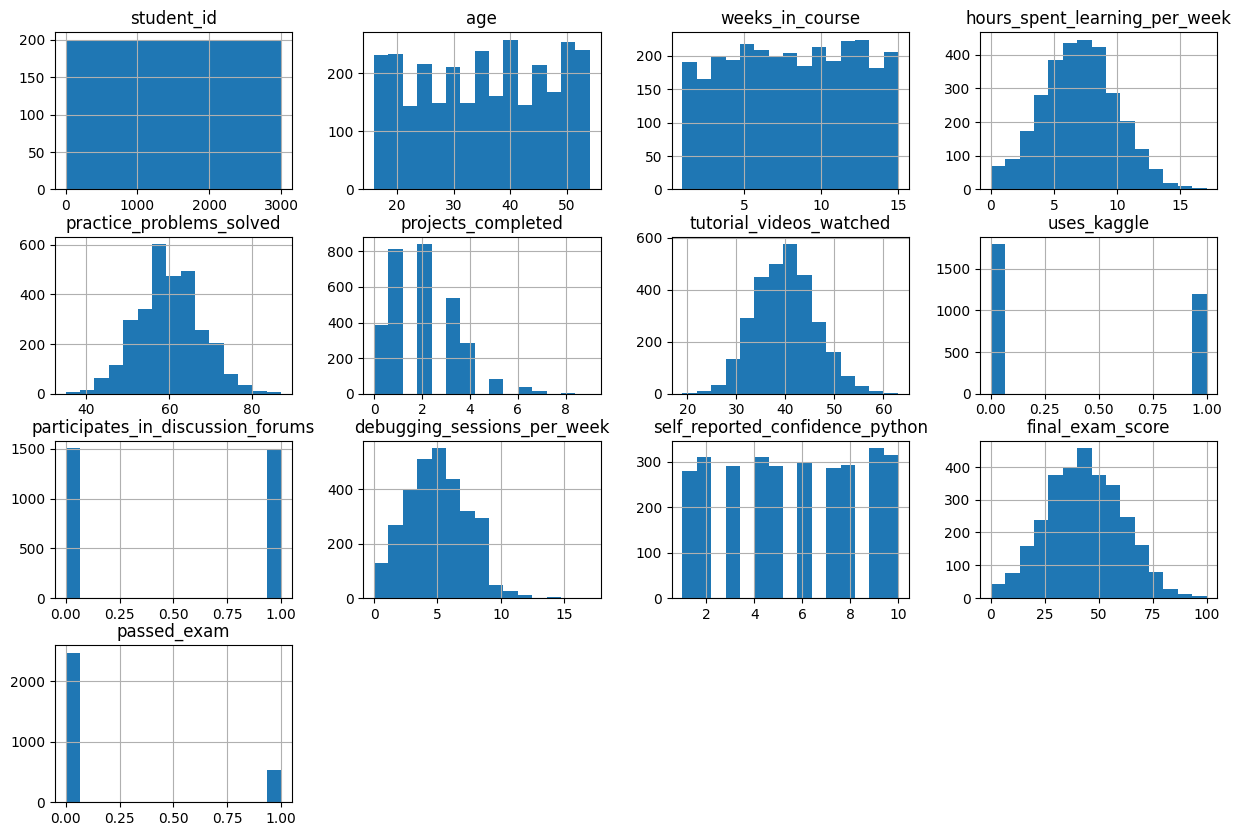

In [29]:
students_data.hist(bins=15, figsize=(15, 10))

- All the variables are inside logical ranges

In [30]:
students_data['country'].value_counts()

country
Brazil        339
Germany       319
India         304
Other         302
USA           298
UK            297
Indonesia     295
Pakistan      294
Bangladesh    286
Nigeria       266
Name: count, dtype: int64

### Now we need to define what we are going to do:
#### **Part 1 - Data Analysis**
- Calculate the number of students who passed the final exam in each country.
- Analyze the relationship between numerical variables and the final exam score (correlation).
- Age distribution of students enrolled in the course and of those who passed the exam
- Average grade as a function of the amount of projects completed and weeks that students have been enrolled in this course
- What is more important been a kaggle user or had participated in forum discussions?
- Define the feature matrix X and the target variables for both regression and classification
#### **Part 2 - Machine Learning: Regression**
##### **Regression**
- Define X and y (score) for the regression task.
- Fillna and Encoding categorical variable
- Train three different regression models and evaluate their performance using multiple metrics such as RMSE, MAE, and R² (Regression Benchmark).
- Perform hyperparameter tuning (e.g., GridSearch, RandomSearch, Bayesian optimization) for the best-performing regression model.


# **Part 1 -** Data Analysis

## Variables correlation with final exam score

In [31]:
students_data.columns

Index(['student_id', 'age', 'country', 'weeks_in_course',
       'hours_spent_learning_per_week', 'practice_problems_solved',
       'projects_completed', 'tutorial_videos_watched', 'uses_kaggle',
       'participates_in_discussion_forums', 'debugging_sessions_per_week',
       'self_reported_confidence_python', 'final_exam_score', 'passed_exam'],
      dtype='object')

In [32]:
numeric_columns = ['age', 'weeks_in_course',
       'hours_spent_learning_per_week', 'practice_problems_solved',
       'projects_completed', 'tutorial_videos_watched', 'uses_kaggle',
       'participates_in_discussion_forums', 'debugging_sessions_per_week',
       'self_reported_confidence_python']


Text(0.5, 1.0, 'Mutual Information Scores between Numeric Features and Final Exam Score')

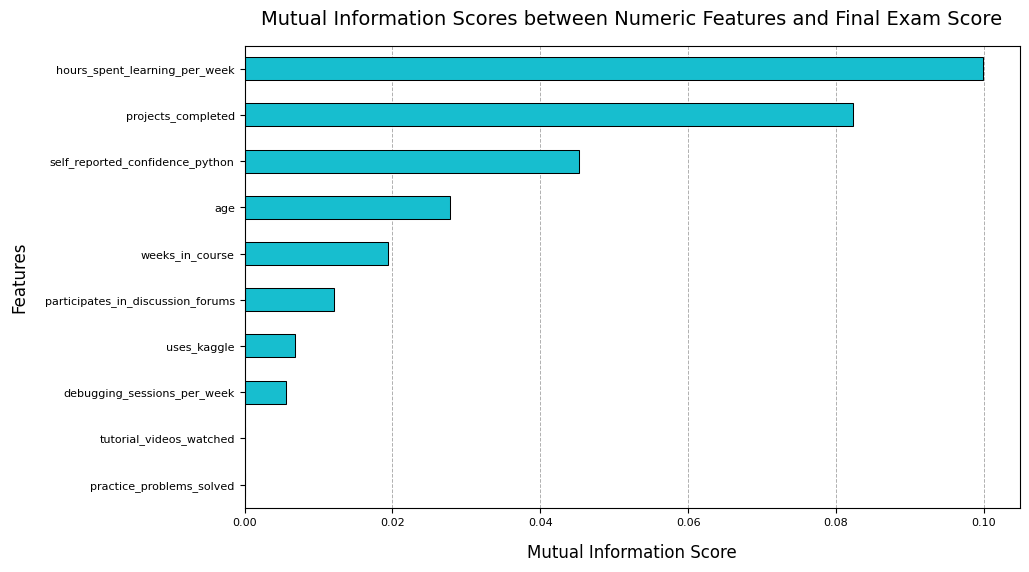

In [33]:
# Numerical variables correlation with final exam score

from sklearn.feature_selection import mutual_info_regression

X = students_data[numeric_columns]
y = students_data['final_exam_score']

mi = mutual_info_regression(X, y, discrete_features=False, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values()
fig_corre = mi_series.plot.barh(figsize=(10,6), color="#17BECF", edgecolor='black', linewidth=0.75, zorder=2)
plt.grid(axis='x', linestyle='--', linewidth=0.7, zorder=3)
plt.xlabel('Mutual Information Score', fontsize=12, labelpad=12)
plt.ylabel('Features', fontsize=12, labelpad=12)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.title('Mutual Information Scores between Numeric Features and Final Exam Score', fontsize=14, pad=15)

- We can conclude that the number of hours spent studying per week and the number of completed projects are the most important features for achieving a high grade

## Age distribution of all students and those who passed the exam

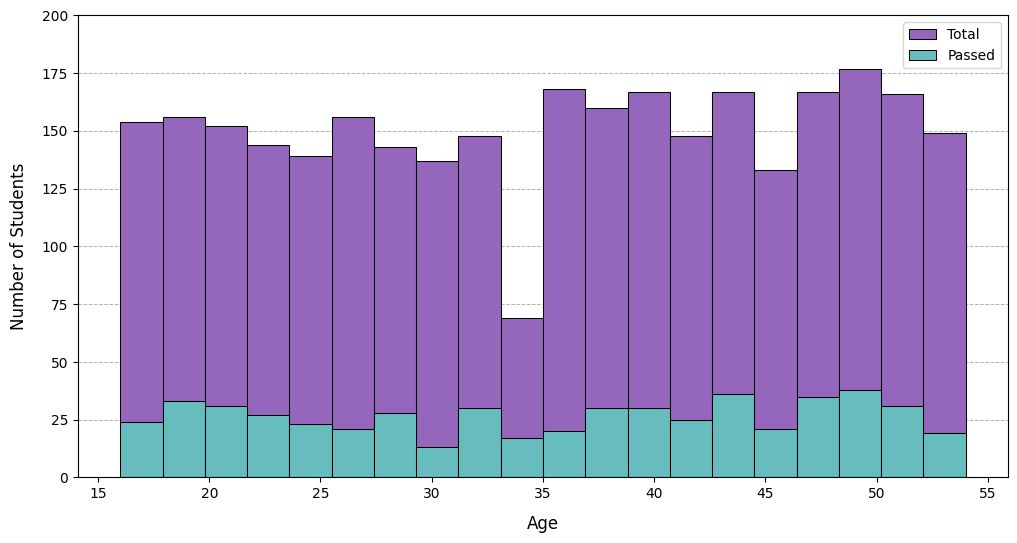

In [34]:
plt.figure(figsize=(12,6))

plt.hist(students_data['age'], bins=20, color='#9467BD', edgecolor='black', linewidth=0.75, zorder=2)
plt.hist(students_data[students_data['passed_exam']==1]['age'], bins=20, color="#67BDBD", edgecolor='black', linewidth=0.75, zorder=2)
plt.xlabel('Age', fontsize=12, labelpad=10)
plt.ylabel('Number of Students', fontsize=12, labelpad=10)
plt.ylim(0, 200)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Total', 'Passed'], title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.7, zorder=3)
plt.show()


- There is no specific age range in which students consistently outperform others, although individuals aged 33–35 show a relatively high exam pass rate

## Average grade as a function of the amount of projects completed

In [35]:
students_data.head()

,student_id,age,country,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,3,3.5,62,1,47,1,0,3,7,24.8,0


In [36]:
students_data.groupby('projects_completed')['final_exam_score'].mean()


projects_completed
0    33.047927
1    39.015337
2    44.448157
3    47.104097
4    52.717606
5    53.208434
6    61.775676
7    64.014286
8    51.400000
9    52.200000
Name: final_exam_score, dtype: float64

In [37]:
students_data['projects_completed'].value_counts()

projects_completed
2    841
1    815
3    537
0    386
4    284
5     83
6     37
7     14
8      2
9      1
Name: count, dtype: int64

- The mean values for students who completed 8 or 9 projects are not representative, as the sample sizes are very small (2 and 1 students, respectively)

In [38]:
students_data[students_data['projects_completed'] <= 7]['projects_completed'].value_counts().sort_index()

projects_completed
0    386
1    815
2    841
3    537
4    284
5     83
6     37
7     14
Name: count, dtype: int64

In [39]:
students_data['weeks_in_course'].value_counts().sort_index()

weeks_in_course
1     190
2     165
3     200
4     193
5     217
6     209
7     199
8     204
9     185
10    213
11    192
12    222
13    224
14    181
15    206
Name: count, dtype: int64

In [40]:
avg_per_week_in_course = students_data.groupby('weeks_in_course')['final_exam_score'].mean()

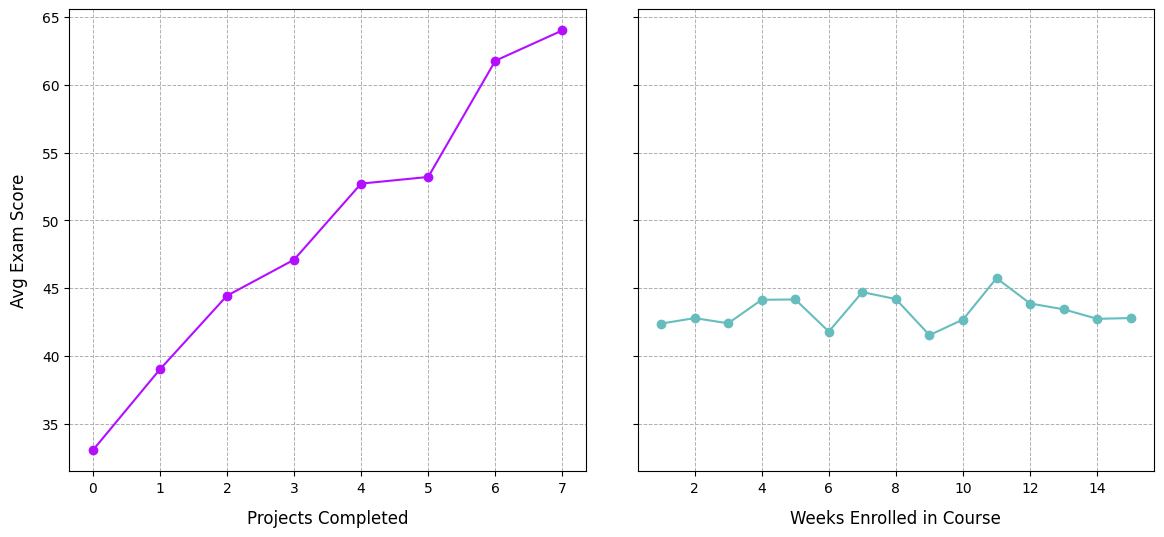

In [41]:
# Making a two graphs plot

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharey=True, gridspec_kw={'wspace': 0.1})

avg_per_project = students_data.query('projects_completed <= 7').groupby('projects_completed')['final_exam_score'].mean()

axs[0].plot(avg_per_project.index, avg_per_project.values, marker='o', color="#B30EFF", zorder=2)
axs[1].plot(avg_per_week_in_course.index, avg_per_week_in_course.values, marker='o', color="#67BDBD", zorder=2)

#avg_per_project.plot(marker='o', figsize=(10,6), color="#B30EFF", zorder=2)
#avg_per_week_in_course.plot(marker='o', figsize=(10,6), color="#FF5733", zorder=2)

# Customizing the grids
axs[0].grid(axis='both', linestyle='--', linewidth=0.7, zorder=3)
axs[1].grid(axis='both', linestyle='--', linewidth=0.7, zorder=3)

# Customizing the axis labels and ticks
axs[0].set_ylabel('Avg Exam Score', fontsize=12, labelpad=10)

axs[0].set_xlabel('Projects Completed', fontsize=12, labelpad=10)
axs[1].set_xlabel('Weeks Enrolled in Course', fontsize=12, labelpad=10)

axs[0].tick_params(axis='both', which='major', labelsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=10)

- In the figure, we can clearly see that as students complete more projects, their performance on the final exam improves. Meanwhile not matter the amount of weeks that they have been enrolled in the course, avg grade is not changing

## Students who passed per country

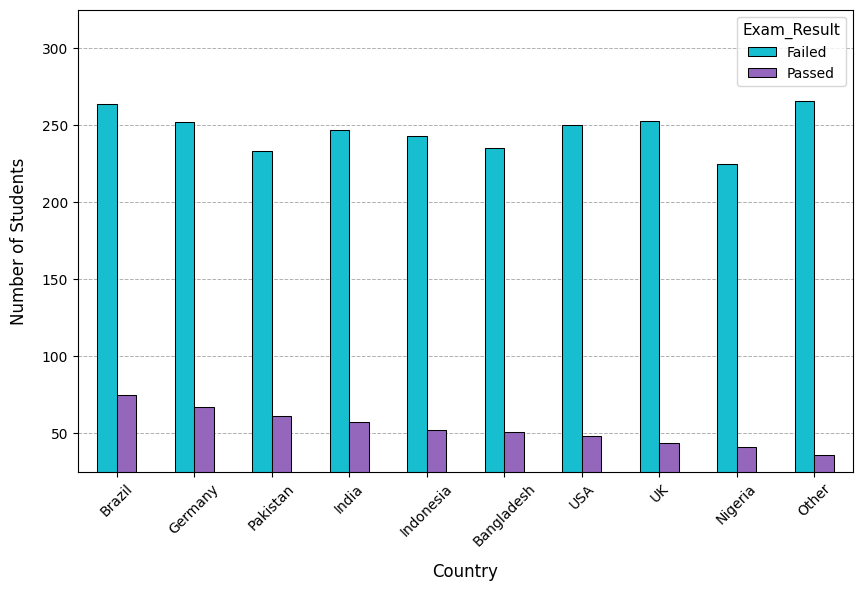

In [42]:
colors = ['#17BECF', '#9467BD']
labels = ['Failed', 'Passed']

passed_per_country = students_data.groupby('country')['passed_exam']

# Plotting the bar chart sorted by number of students who passed per country
fig_passed_country = passed_per_country.value_counts().unstack().sort_values(by=1, ascending=False).plot(kind='bar', edgecolor='black', linewidth=0.75, color = colors, figsize=(10,6), zorder = 2)
fig_passed_country.set_xlabel('Country', fontsize=12, labelpad=10)
fig_passed_country.set_ylabel('Number of Students', fontsize=12, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)
plt.legend(labels, title='Exam_Result', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.7, zorder = 3)
plt.ylim(25, 325)
plt.show()

In [43]:
# Calculating the percentage of students who passed per country
country_df = passed_per_country.value_counts().unstack().sort_values(by=1, ascending=False)
percent = country_df.iloc[:,1]/(country_df.iloc[:,0] + country_df.iloc[:,1]) * 100
percent

country
Brazil        22.123894
Germany       21.003135
Pakistan      20.748299
India         18.750000
Indonesia     17.627119
Bangladesh    17.832168
USA           16.107383
UK            14.814815
Nigeria       15.413534
Other         11.920530
dtype: float64

- As shown in the graph and the table above, Brazil is not only the country with the highest number of students who passed but also the one with the highest success rate.

### Kaggle user vs forum discussion participants

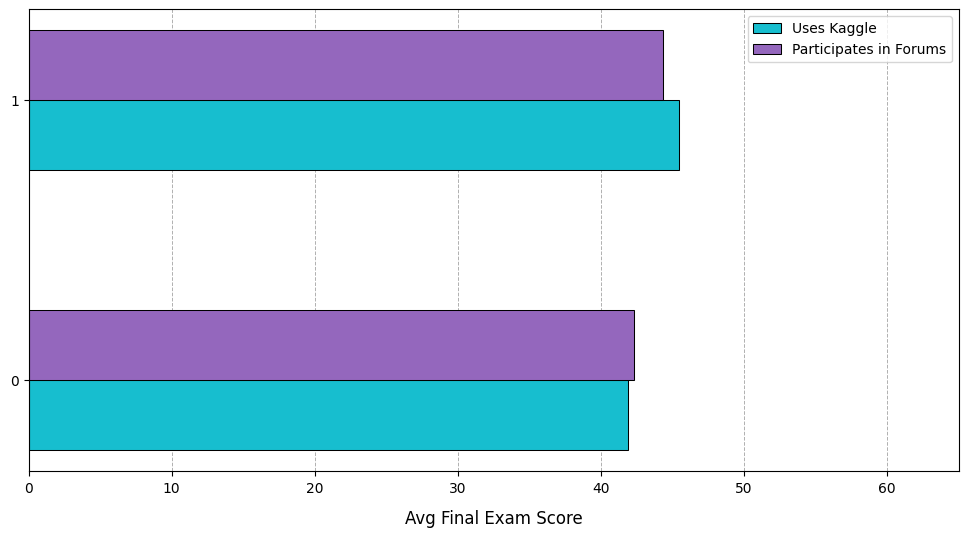

In [44]:
kaggle_user_data = students_data.groupby('uses_kaggle')['final_exam_score'].mean()
participation_user_data = students_data.groupby('participates_in_discussion_forums')['final_exam_score'].mean()

import numpy as np

labels = kaggle_user_data.index.astype(str)

y = np.arange(len(labels))   # base y positions
height = 0.25               # thickness of each bar

plt.figure(figsize=(12, 6))

plt.barh(
    y - height/2,
    kaggle_user_data.values,
    height=height,
    color=colors[0],
    edgecolor='black',
    linewidth=0.75,
    zorder=2,
    label='Uses Kaggle'
)

plt.barh(
    y + height/2,
    participation_user_data.values,
    height=height,
    color=colors[1],
    edgecolor='black',
    linewidth=0.75,
    zorder=2,
    label='Participates in Forums'
)

plt.yticks(y, labels)
plt.xlim(0, 65)
plt.grid(axis='x', linestyle='--', linewidth=0.7, zorder=1)
plt.xlabel('Avg Final Exam Score', fontsize=12, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

plt.show()


- There is no significant difference in the average grade between students who use Kaggle and those who participate in forum discussions. This is in agreement with the first graph, indicating that these two features don't have a strong influence on final exam scores.

# **Part 2-** Machine Learning: Regresion

In [88]:
students_data_df.columns

Index(['student_id', 'age', 'country', 'prior_programming_experience',
       'weeks_in_course', 'hours_spent_learning_per_week',
       'practice_problems_solved', 'projects_completed',
       'tutorial_videos_watched', 'uses_kaggle',
       'participates_in_discussion_forums', 'debugging_sessions_per_week',
       'self_reported_confidence_python', 'final_exam_score', 'passed_exam'],
      dtype='object')

In [89]:
students_data_df.dtypes

student_id                             int64
age                                    int64
country                               object
prior_programming_experience          object
weeks_in_course                        int64
hours_spent_learning_per_week        float64
practice_problems_solved               int64
projects_completed                     int64
tutorial_videos_watched                int64
uses_kaggle                            int64
participates_in_discussion_forums      int64
debugging_sessions_per_week            int64
self_reported_confidence_python        int64
final_exam_score                     float64
passed_exam                            int64
dtype: object

# For me Pipeline + ColumnTransformer

### Importing libraries

In [173]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

### Selecting features and splitting train-test

In [174]:
y = students_data_df['final_exam_score']  
X = students_data_df.drop(columns=['passed_exam', 'final_exam_score', 'country'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipeline and ColumnTransformer to Fillnan and OneHotEncode prior_programming_experience column

In [175]:
categorical_feature = 'prior_programming_experience'

categorical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, [categorical_feature])
])

model_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__min_samples_split': [2, 5, 8]
}

grid = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

In [177]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best CV MAE:", -grid.best_score_)
print("Test MAE:", mae)
print("Test R²:", r2)

Best CV MAE: 204.68618867823577
Test MAE: 11.888372457059731
Test R²: 0.27889813586753787


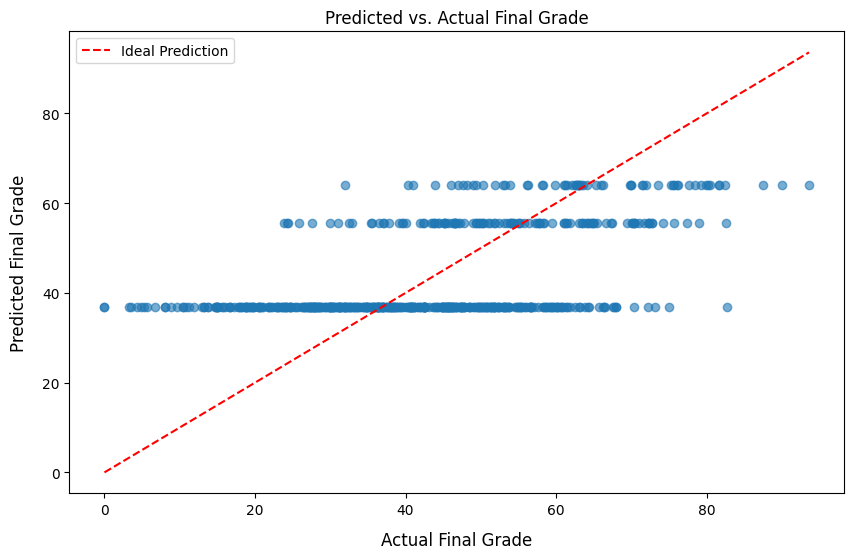

In [178]:
# Graph 1: Actual vs Predicted Final Exam Scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label ='Ideal Prediction')
plt.xlabel("Actual Final Grade", labelpad=10, fontsize = 12)
plt.ylabel("Predicted Final Grade", labelpad=10, fontsize = 12)
plt.title("Predicted vs. Actual Final Grade", fontsize = 12)
plt.legend()
plt.show()

- Tried with random forest regressor but the results aren't great, probably because there is small correlation among features and grade
- I droped 'passed_exam' column to prevent data leakage and 'country' because of it's high cardinality